In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Upload sc-rnaseq matrix and cell type lables 

In [2]:
norm_data = pd.read_csv('../data/normalized_expr_mat.csv', index_col=0)

In [3]:
norm_data

,a,abd-A,Abd-B,Abl,abo,ac,acj6,Acph-1,Act5C,Act42A,...,lncRNA:CR43716,lncRNA:CR44997,asRNA:CR45151,lncRNA:CR45310,lncRNA:CR45425,asRNA:CR45822,asRNA:CR45891,lncRNA:CR45961,lncRNA:CR46032,lncRNA:CR46119
TP1_AACTCAGGTAAATACG,0.0,0.000000,0.0,0.0,0.466624,0.000000,0.0,0.0,2.764117,1.750383,...,0,0,0.0,0,0.0,0.0,0.0,0.0,0,0.0
TP1_TCACGAATCTATCGCC,0.0,1.053208,0.0,0.0,0.000000,0.483831,0.0,0.0,2.879282,1.053208,...,0,0,0.0,0,0.0,0.0,0.0,0.0,0,0.0
TP1_TACGGTACAATAGAGT,0.0,0.813928,0.0,0.0,0.000000,0.000000,0.0,0.0,2.458085,1.059571,...,0,0,0.0,0,0.0,0.0,0.0,0.0,0,0.0
TP1_CAACTAGAGAGACGAA,0.0,0.000000,0.0,0.0,0.000000,0.888313,0.0,0.0,2.728522,2.006819,...,0,0,0.0,0,0.0,0.0,0.0,0.0,0,0.0
TP1_GCGCCAAAGTCGATAA,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,3.294131,1.989672,...,0,0,0.0,0,0.0,0.0,0.0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TP2.2_AACACGTCATTCACTT,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,2.463590,...,0,0,0.0,0,0.0,0.0,0.0,0.0,0,0.0
TP2.2_TCTTTCCGTACCGTTA,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,3.506908,2.466545,...,0,0,0.0,0,0.0,0.0,0.0,0.0,0,0.0
TP2.2_GATTCAGCACACGCTG,0.0,2.470005,0.0,0.0,0.000000,1.858055,0.0,0.0,3.119940,1.858055,...,0,0,0.0,0,0.0,0.0,0.0,0.0,0,0.0
TP2.2_TGAGCATGTGATGTCT,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,1.854410,2.466052,...,0,0,0.0,0,0.0,0.0,0.0,0.0,0,0.0


In [4]:
labels = pd.read_csv('../data/cell_type.csv', index_col=0)
labels

,type
TP1_AACTCAGGTAAATACG,5-6
TP1_TCACGAATCTATCGCC,7-1
TP1_TACGGTACAATAGAGT,7-1
TP1_CAACTAGAGAGACGAA,7-4
TP1_GCGCCAAAGTCGATAA,1-1
...,...
TP2.2_AACACGTCATTCACTT,6-2
TP2.2_TCTTTCCGTACCGTTA,6-2
TP2.2_GATTCAGCACACGCTG,7-4
TP2.2_TGAGCATGTGATGTCT,3-2


In [5]:
labels.type.unique().tolist()

['5-6',
 '7-1',
 '7-4',
 '1-1',
 '1-2',
 '5-2',
 'MG',
 '5-3',
 '3-5',
 '3-2',
 '2-5',
 '4-2',
 '5-4',
 '6-2',
 '2-4']

In [6]:
norm_data = norm_data.join(labels)

In [7]:
X = norm_data.iloc[:,:-1]
Y = norm_data.iloc[:,-1:]

Data exploration

(array([1.700e+01, 1.640e+02, 6.080e+02, 8.890e+02, 1.007e+03, 6.700e+02,
        3.810e+02, 1.040e+02, 1.400e+01, 1.000e+00]),
 array([0.30266033, 0.31714037, 0.33162042, 0.34610046, 0.36058051,
        0.37506055, 0.3895406 , 0.40402064, 0.41850069, 0.43298073,
        0.44746078]),
 <BarContainer object of 10 artists>)

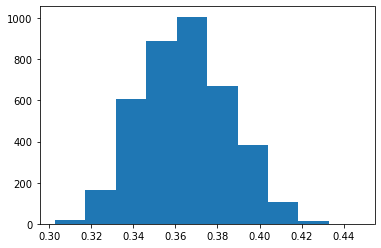

In [61]:
plt.hist(X.var(axis='columns'))

<AxesSubplot:>

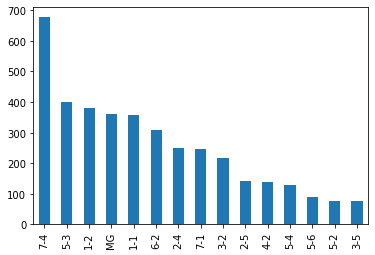

In [75]:
Y.type.value_counts().plot(kind='bar')

----------

In [13]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [10]:
rf = RandomForestClassifier()

In [14]:
clf = rf.fit(x_train, y_train)

/var/folders/bj/k8m8vhfd5kgfbr0b9l41ybnw0000gn/T/ipykernel_55965/2634791530.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf = rf.fit(x_train, y_train)


In [15]:
y_pred = rf.predict(x_test)

In [18]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.74189364461738


In [63]:
acc_train = clf.score(X_train, y_train)
print("Accuracy on train = %0.4f " % acc_train)
acc_test = clf.score(X_test, y_test)
print("Accuracy on test = %0.4f " % acc_test)

Accuracy on train = 1.0000 
Accuracy on test = 0.6677 


In [19]:
y_predicteds = clf.predict(x_test)
cm = confusion_matrix(y_test, y_predicteds)
print("Confusion matrix: ")
print(cm)

Confusion matrix: 
[[ 55   3   0   0   0   0   0   0   0   0   0   0   1   4   0]
 [  6  74   0   0   0   0   0   0   1   0   0   1   0   4   0]
 [  1   6  34   0   0   0   0   0   0   0   0   1   0   4   0]
 [  0   0   0  22   0   0   0   0   0   0   0   0   0   1   1]
 [  0   1   0   0  18   0   1   0   1   0   0   1   0  12   0]
 [  4   1   3   2   0   0   0   0   1   0   0   3   0   1   2]
 [  0   0   2   0   3   0  10   0   0   0   0   5   0   4   1]
 [  1   0   0   0   0   0   0   0  11   0   0   0   0   3   0]
 [  1   0   0   0   1   0   0   0  55   0   0   0   2  10   0]
 [  1   0   3   0   0   0   0   0   5  12   0   3   0   1   0]
 [  0   0   0   0   0   0   0   0   8   0   1   0   0  15   0]
 [  4   2   2   0   6   0   0   0   5   0   0  41   0   6   2]
 [  1   1   0   0   0   0   0   0   5   0   0   0  49   7   0]
 [  2   0   0   0   0   0   0   0   0   0   0   0   0 137   1]
 [  0   2   0   0   0   0   0   0   2   0   0   0   1   3  64]]


In [20]:
display_labels=labels.type.unique().tolist()

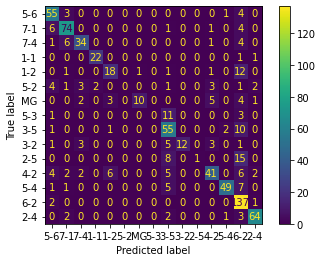

In [21]:
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm, 
    display_labels=display_labels
    )
disp.plot()

normalized confusion matrix

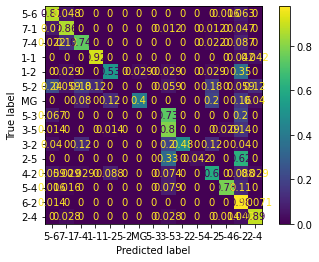

In [23]:
disp = ConfusionMatrixDisplay.from_estimator(
        clf,
        x_test,
        y_test,
        display_labels=display_labels,
        normalize='true',
    )


TO DO: feature selection (start with variance), balance the data


### Feature Selection - Variance

In [24]:
from sklearn.feature_selection import VarianceThreshold

By default, it removes all zero-variance features, i.e. features that have the same value in all samples.

In [33]:
selector = VarianceThreshold()

In [34]:
x_VarSelected = selector.fit_transform(X)

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x_VarSelected, Y, test_size=0.2)
clf = rf.fit(x_train, y_train)

/var/folders/bj/k8m8vhfd5kgfbr0b9l41ybnw0000gn/T/ipykernel_55965/2115711810.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf = rf.fit(x_train, y_train)


In [36]:
y_pred = rf.predict(x_test)

In [37]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)  # slightly better

Accuracy: 0.7561608300907912


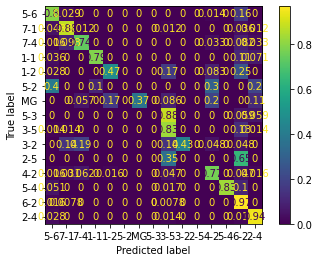

In [38]:
disp = ConfusionMatrixDisplay.from_estimator(  # normalized accuracy
        clf,
        x_test,
        y_test,
        display_labels=display_labels,
        normalize='true',
    )

Check with 0.35 threshold

In [76]:
selector = VarianceThreshold(0.35)
x_VarSelected = selector.fit_transform(X)

In [77]:
x_train, x_test, y_train, y_test = train_test_split(x_VarSelected, Y, test_size=0.2)
clf = rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

/var/folders/bj/k8m8vhfd5kgfbr0b9l41ybnw0000gn/T/ipykernel_55965/90486123.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf = rf.fit(x_train, y_train)


In [48]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)  # slightly better

Accuracy: 0.7574578469520103


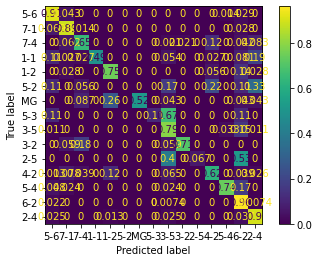

In [49]:
disp = ConfusionMatrixDisplay.from_estimator(  # normalized accuracy
        clf,
        x_test,
        y_test,
        display_labels=display_labels,
        normalize='true',
    )

### CatBoost Classifier 

In [78]:
from catboost import CatBoostClassifier

In [79]:
help(CatBoostClassifier)

Help on class CatBoostClassifier in module catboost.core:

class CatBoostClassifier(CatBoost)
 |  CatBoostClassifier(iterations=None, learning_rate=None, depth=None, l2_leaf_reg=None, model_size_reg=None, rsm=None, loss_function=None, border_count=None, feature_border_type=None, per_float_feature_quantization=None, input_borders=None, output_borders=None, fold_permutation_block=None, od_pval=None, od_wait=None, od_type=None, nan_mode=None, counter_calc_method=None, leaf_estimation_iterations=None, leaf_estimation_method=None, thread_count=None, random_seed=None, use_best_model=None, best_model_min_trees=None, verbose=None, silent=None, logging_level=None, metric_period=None, ctr_leaf_count_limit=None, store_all_simple_ctr=None, max_ctr_complexity=None, has_time=None, allow_const_label=None, target_border=None, classes_count=None, class_weights=None, auto_class_weights=None, class_names=None, one_hot_max_size=None, random_strength=None, random_score_type=None, name=None, ignored_feature